## Question-1

Number of nodes: 35776
Number of edges: 124330


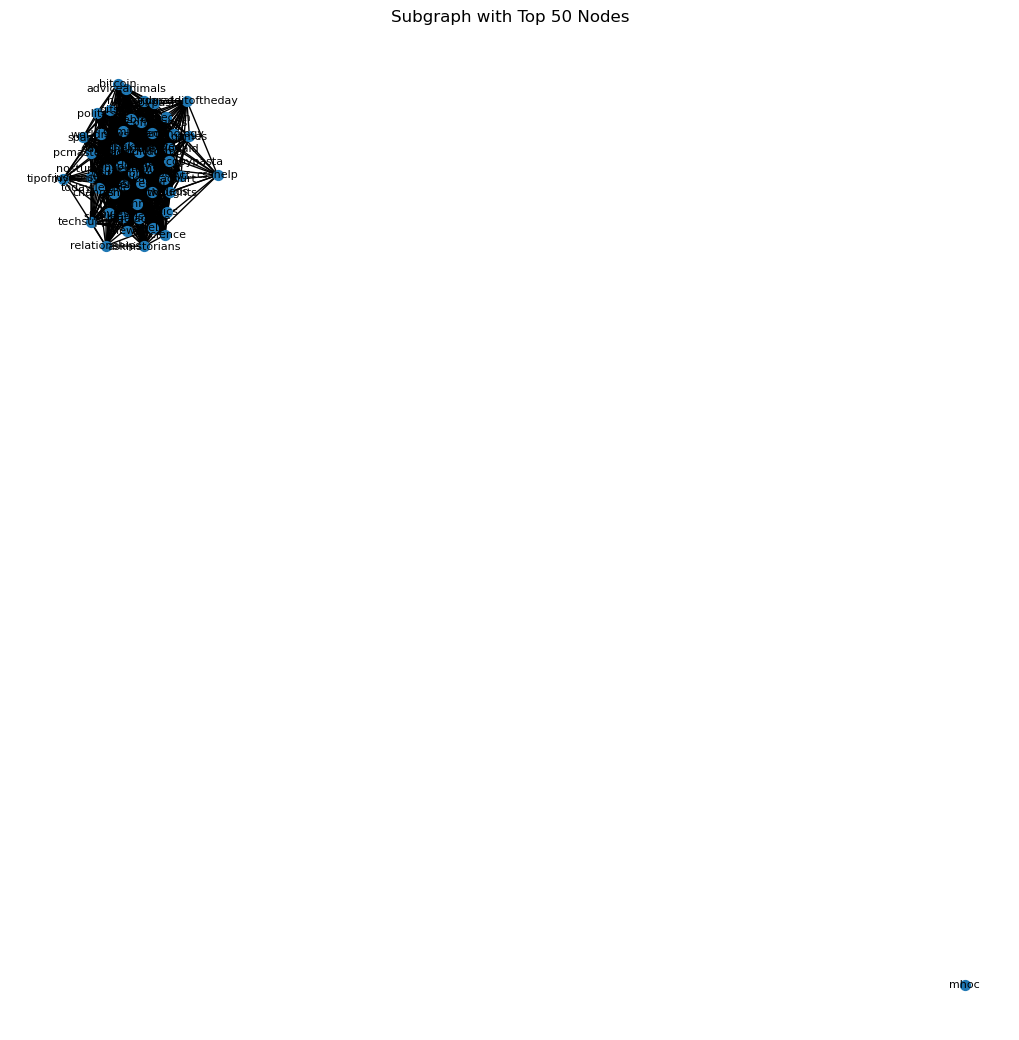

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data using Pandas
df = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t', header=None, names=['source', 'target', 'weight'])

# Create a NetworkX graph from the dataframe
G = nx.from_pandas_edgelist(df, source='source', target='target')

# Count nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

# Select the top 50 nodes by degree
top_50_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
subgraph = G.subgraph([n for n, _ in top_50_nodes])

# Visualize the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=True, node_size=50, font_size=8)
plt.title('Subgraph with Top 50 Nodes')
plt.show()


## Question-2

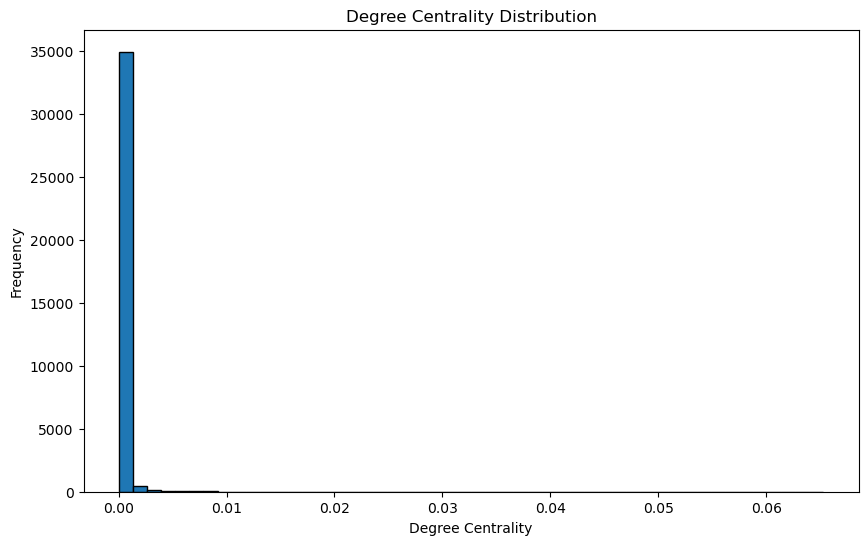

In [6]:
def plot_degree_centrality(G):
    degree_centrality = nx.degree_centrality(G)
    plt.figure(figsize=(10, 6))
    plt.hist(degree_centrality.values(), bins=50, edgecolor='k')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Frequency')
    plt.title('Degree Centrality Distribution')
    plt.show()

# Call the function
plot_degree_centrality(G)


## Question-3

In [44]:
import random
def highest_betweenness_centrality_edge_approx(G, sample_size=100):
    nodes = list(G.nodes)
    sample_nodes = random.sample(nodes, min(len(nodes), sample_size))
    betweenness_centrality = nx.edge_betweenness_centrality_subset(G, sources=sample_nodes, targets=sample_nodes)
    max_edge = max(betweenness_centrality, key=betweenness_centrality.get)
    return max_edge
print("Edge with highest betweenness centrality (approx):", highest_betweenness_centrality_edge_approx(G, sample_size=100))

Edge with highest betweenness centrality (approx): ('subredditoftheday', 'hotpeppers')


## Question-4

In [30]:
def approximate_closeness_centrality(G, sample_size=300):
    nodes = list(G.nodes)
    sample_nodes = random.sample(nodes, min(len(nodes), sample_size))
    closeness_centrality = {}
    for node in sample_nodes:
        path_lengths = nx.single_source_shortest_path_length(G, node)
        closeness_centrality[node] = (len(path_lengths) - 1) / sum(path_lengths.values())
    return closeness_centrality
approx_closeness_centrality = approximate_closeness_centrality(G, sample_size=100)
print(approx_closeness_centrality)

{'placepi': 0.25276680130065177, 'adoptareddit': 0.2811385014596173, 'nonpressers': 0.2552192220488207, 'bcachefs': 0.25680340133031127, 'neckbeardrpg': 0.27371844974459786, 'bc24': 0.26499228029411315, 'surfacegaming': 0.24941907728610174, 'randomactsofmakeup': 0.25853069259679057, 'bernieblitz': 0.26395127521888084, 'highmage': 0.25309709964010135, 'honyakutest': 0.26143150147795136, 'alchemy': 0.25512344089186506, 'wordpressthemes': 0.25644818888551923, 'tindersupport': 0.2496166113483041, 'myportal': 0.25736576820007273, 'exchristianwomen': 0.24529156230985835, 'pussified': 0.2929001081373344, 'shittydiy': 0.25277785878853276, 'brussels': 0.27915103302790706, 'digimon': 0.2874602016449987, 'relgman': 0.23174823865991095, 'teambestchat': 0.23253786201993373, 'anxiety': 0.3367915913815547, 'ladydynamitenetflix': 0.26129554960997853, 'debatefeminism': 0.2624268618531106, 'reddittestingchamber': 0.24147826208087816, 'denmarkforsanders': 0.26395127521888084, 'crashbandicoot': 0.22597949

## Question-5a

In [26]:
def eigenvector_centrality(G):
    eigenvector_cent = nx.eigenvector_centrality(G)
    return eigenvector_cent
eigenvector_centralities = eigenvector_centrality(G)
top_10_nodes = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by eigenvector centrality:", top_10_nodes)

Top 10 nodes by eigenvector centrality: [('askreddit', 0.19980016082723695), ('subredditdrama', 0.17251286662845228), ('iama', 0.16843359927641857), ('outoftheloop', 0.12848857130092378), ('pics', 0.11509786622734265), ('videos', 0.11367799569072377), ('todayilearned', 0.10991787698584357), ('explainlikeimfive', 0.10581573749892494), ('funny', 0.10344128462091136), ('conspiracy', 0.10138858601671512)]


## Question-6

In [46]:
def recompute_after_removal(G):
    highest_degree_node = max(G.degree, key=lambda x: x[1])[0]
    G.remove_node(highest_degree_node)
    return eigenvector_centrality(G)
updated_eigenvector_centralities = recompute_after_removal(G)
top_10_updated_nodes = sorted(updated_eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes after removal by updated eigenvector centrality:", top_10_updated_nodes)

Top 10 nodes after removal by updated eigenvector centrality: [('subredditdrama', 0.18061439320062145), ('iama', 0.1753032967178961), ('outoftheloop', 0.1344229590947848), ('pics', 0.11876038557916123), ('videos', 0.11817902659382694), ('todayilearned', 0.11353078246932646), ('explainlikeimfive', 0.11005878834445265), ('funny', 0.1067759875468877), ('conspiracy', 0.10615962987380366), ('drama', 0.10333025309003985)]
